# Group 1 - Project Proposal: Predicting Loan Default

Team members: Luca Matteucci, Santiago Mazzei, Srithijaa Sankepally, and Victor Floriano


To-do list - not including final write/clean ups for final deliverable
*Update/change this file as needed

Load + EDA + Cleaning
Get a smaller sample of the data - Victor
Figure out necessary clean/transform steps and add them to Colab file - Victor
Create test set
Create pre-processing pipeline
Add feature selection (if we are not sort on time maybe test 2 methods?)
Select 3-4 predictive model
Train model 1 and evaluate on train set (CV)
Fine tune model
Train model 2 and evaluate on train set (CV)
Fine tune model
Train model 3 and evaluate on train set (CV)
Fine tune model
(If 4) Train model 4 and evaluate on train set (CV)
Fine tune model

Compare model performance and pick the best one
Test final model predictions on test set


**Problem Statement:**

Our goal is to predict what customers are more likely to default on their loan payments. By analyzing the Lending Club Loan dataset, we aim to understand the factors that contribute to loan defaults and late payments, as well as why some borrowers can't repay their loans on time, and to find out what helps borrowers succeed. We want to make the lending process better, reduce default risk, and increase profitability for lenders.

**Data Source:**

We will use the Lending Club Loan dataset, which includes complete loan data for loans issued from 2007 to 2015. The Lending Club is a peer-to-peer lending company that matches people looking to invest money with people looking to borrow money. The dataset provides information about borrowers, loan characteristics, and loan performance. The data is freely available on Kaggle at: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv




**Data Description:**

The dataset contains approximately 2,260,668 observations and 145 variables (columns). The variables include information, such as borrower characteristics (e.g., credit scores, income, employment details), loan characteristics (e.g., loan amount, interest rate, purpose), and loan performance data (e.g., current loan status, delinquency history). Some of the variables we expect to be useful for our analysis include: `annual_inc`, `loan_amnt`, `int_rate`, `delinq_2yrs`, `purpose`, among others.

The dataset contains multiple data types, including float64 (105 instances), int64 (4 instances), and object (36 instances). Additionally, it includes several variables that necessitate preprocessing, such as:
1. Binary values assigned to 'Y'/'N'. (i.e. `hardship_flag`)
2. Object columns would work better as datetime. (i.e. `settlement_date`)
3. Variables with text input. (i.e. `desc`)

**Loading the data and brief exploration:**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')
loan_df = pd.read_csv('/content/drive/MyDrive/BU_MSBA/BA810/Data/loan.csv')

Mounted at /content/drive


<ipython-input-2-f5231390c1e7>:3: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('/content/drive/MyDrive/BU_MSBA/BA810/Data/loan.csv')


#Sampling from original Dataset

To avoid issues in our cola notebook, we decided to use a sample of the original data for train/test our models. Before moving to the next steps, make sure that the entire original dataset was loaded in the colba environment, the cell below `loan_df.info()` should return DataFrame with 2,260,667 records.

In [3]:
#Display the number of entries, columns, and dtypes
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [4]:
#Our target variable contains multiple values, we will
#transform this column into a binary 0/1 variable

print('Distribution of loan_status values in the original dataset:\n')
loan_df['loan_status'].value_counts(normalize=True) * 100

Distribution of loan_status values in the original dataset:



Fully Paid                                             46.090448
Current                                                40.682444
Charged Off                                            11.574234
Late (31-120 days)                                      0.968608
In Grace Period                                         0.395989
Late (16-30 days)                                       0.165305
Does not meet the credit policy. Status:Fully Paid      0.087939
Does not meet the credit policy. Status:Charged Off     0.033663
Default                                                 0.001371
Name: loan_status, dtype: float64

To create a representative sample from our original dataset, we used the `train_test_split` method to create a stratified sample.

In [5]:
#Split the data into a left_out portion and our stratified sample
left_out, sample_df = train_test_split(loan_df, test_size=0.1,
                                       stratify=loan_df['loan_status'],
                                       random_state=42)

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226067 entries, 1624968 to 850605
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 251.8+ MB


After creating our sample we check the distribution of loan_status to verify if it resembled the original dataset. While there was small difference in the distribution of loan_status values, the distribution is very similar to the original dataset.

In [6]:
#Check loan_status distribution for sample_df
print('Distribution of loan_status values in the sample dataset:\n')
sample_df['loan_status'].value_counts(normalize=True) * 100

Distribution of loan_status values in the sample dataset:



Fully Paid                                             46.090318
Current                                                40.682629
Charged Off                                            11.574002
Late (31-120 days)                                      0.968739
In Grace Period                                         0.395900
Late (16-30 days)                                       0.165438
Does not meet the credit policy. Status:Fully Paid      0.088027
Does not meet the credit policy. Status:Charged Off     0.033618
Default                                                 0.001327
Name: loan_status, dtype: float64

To clean RAM space in our Colab environment, we proceeded to remove the original dataset and the unused data

In [7]:
#Remove original dataset and unused data
del loan_df
del left_out

#Manually trigger garbage collection
gc.collect()

0

#Initial data exploration

In [8]:
#Summary Statstics of selected varibles
sample_df[['annual_inc', 'loan_amnt', 'int_rate', 'delinq_2yrs']].describe()

,annual_inc,loan_amnt,int_rate,delinq_2yrs
count,2.260670e+05,226067.000000,226067.000000,226064.000000
mean,7.795873e+04,15030.837760,13.101220,0.306962
std,1.445851e+05,9180.481586,4.832823,0.866900
min,0.000000e+00,925.000000,5.310000,0.000000
25%,4.600000e+04,8000.000000,9.490000,0.000000
50%,6.500000e+04,12800.000000,12.620000,0.000000
75%,9.300000e+04,20000.000000,15.990000,0.000000
max,6.100000e+07,40000.000000,30.990000,21.000000


In [9]:
#Correlation matrix of selected key variables
sample_df[['annual_inc', 'loan_amnt', 'int_rate', 'delinq_2yrs']].corr()

,annual_inc,loan_amnt,int_rate,delinq_2yrs
annual_inc,1.000000,0.152551,-0.039509,0.019530
loan_amnt,0.152551,1.000000,0.100701,-0.009959
int_rate,-0.039509,0.100701,1.000000,0.060586
delinq_2yrs,0.019530,-0.009959,0.060586,1.000000


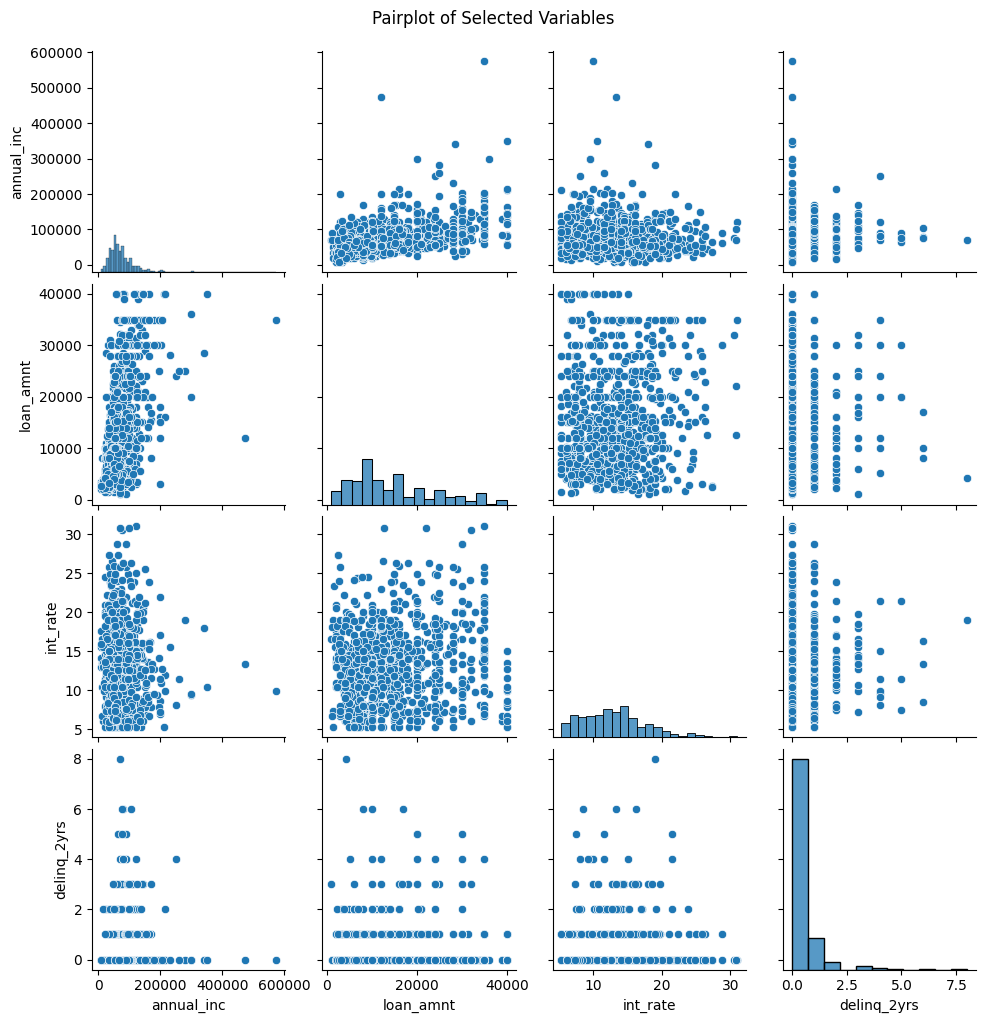

In [10]:
#For the pairplot we had to select a smaller set of the database because
#using the entire dataset was making colab run out of RAM, so here we added
#the pairplot as an example of what we intend to do. In our project we will either
#use google cloud or work wil a smaller set of the original dataset.
loan_sample = sample_df[['annual_inc', 'loan_amnt', 'int_rate',\
                       'delinq_2yrs']].sample(1000, replace=False)

pairplot = sns.pairplot(loan_sample)
pairplot.fig.suptitle('Pairplot of Selected Variables', y=1.02);

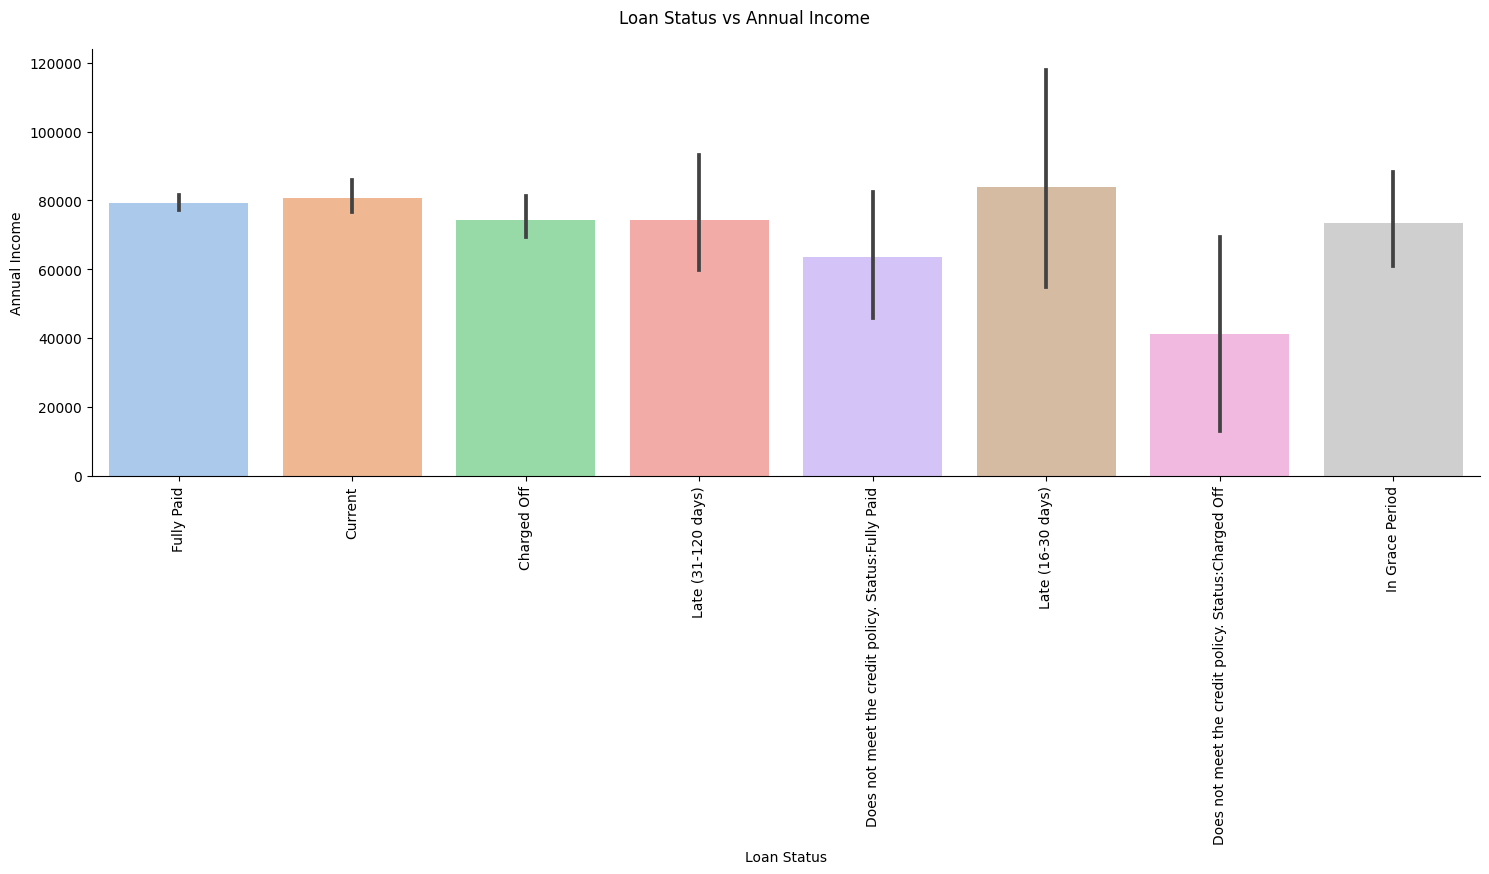

In [11]:
#Graph of the Loan Status vs Annual Income

#Create a new sample of the data
loan_sample_2 = sample_df.sample(5000, replace=False)

catplot = sns.catplot(kind = 'bar', x = 'loan_status',y = 'annual_inc', data = loan_sample_2, palette = 'pastel', aspect=3);
plt.suptitle('Loan Status vs Annual Income', y=1.05)
catplot.set_axis_labels('Loan Status', 'Annual Income')
catplot.set_xticklabels(rotation=90)
plt.show();

**Anticipated Results:**

Our target variable will be whether a customer was charged off/defaulted on the loan or not. Therefore, we will be dealing with a classification problem and our models will return a class 1(default) or 0(no default) based on each record's characterists. We expect to apply pre-processing steps such as data cleaning/imputation of missing values, normalization, and feature selection due to the high dimensionality of our data. For our feature selection we plan to experiment with Sequential Feature Selection and Tree-based Feature Selection (available on scikit-learn)

In order to predict which customers will default on their loans we plan to test the following models:
* Logistic Regression (sklearn-LogisticRegression) (params)
* k-Nearest Neighbors (sklearn-KNeighborsClassifier) (params)
* Decision Tree (sklearn-DecisionTreeClassifier) (params)
* Random Forest (sklearn-RandomForestClassifier) (params)
Assessing the influence of loan amount and term on defaults and late payments.
Exploring patterns in delinquency history and their impact on loan performance.

We will then fine-tune our models hyperparameters to achieve the best performance based on selected metrics such as accuracy, precision, recall, and f1. In order to try multiple hyperparameters we anticipate using parameter search methods such as GridSearchCV and RandomizedSearchCV. Our final step will then be to compare the models and select the best one.


**Potential Implications:**

With the results of this analysis, we expect to be able to identify the biggest drivers of loan default, and to generate a model with relatively accurate predictions.
 1. **Risk Assessment and Mitigation:** Identifying the factors contributing to loan defaults and late payments allows lending institutions to assess the risk associated with potential borrowers more effectively. This can lead to improved risk management practices.

2. **Market Competitiveness:** Borrowers can benefit from more competitive loan terms and rates based on their credit profiles and purposes, resulting in higher customer satisfaction. Investors will also be more attracted because understanding the factors that contribute to loan defaults can help them diversify their investments and potentially earn higher returns.

3. **Compliance with Ethics and Regulations:** Ensuring fair and transparent lending practices, supported by data-driven decisions, can help lending institutions comply with financial regulations and avoid legal issues. This also contributes to the promotion of ethical lending practices by reducing the likelihood of lending discrimination and bias.


#Preparing Data For Machine Learning

## Columns to drop due to missing values:

1.  Among the various columns, `id` and `member_id` serve as unique identifiers. The `id` column is distinct for each loan record, while `member_id` uniquely identifies each borrower. Besides the extensive number of unique values, most data from these features was missing, so we dropped both columns.

2. For the remaining variables in our dataset, we adopted a threshold-based approach, deciding to eliminate any predictors where over 35% of the data was missing. Given the significant lack of available information for those predictors, imputations methods would yield untrustworthy results.
  * 58 columns had more than 35% of their data missing and were dropped from our analysis.

In [61]:
#Set option to display all rows in the output
pd.set_option('display.max_rows', 200)

#Create a Series with the % of missing values for each feature
missing_percent = sample_df.isnull().mean() * 100

#Select only columns with more than 35% of their data missing
#and extract the names of columns to be dropped
columns_to_drop = missing_percent[missing_percent>35.0].index

#Drop columns from sample_df
sample_df.drop(columns=columns_to_drop, inplace=True)

Checking remaining columns for the right data types and listing any additional changes needed:

* `loan_status` : Our TARGET varible, the status of the loan. While multiple values appeared in the data, we re-mapped those to (0 = no default) or (1 = default) | categoric
* `loan_amnt`: The listed amount of the loan applied for by the borrower | **numeric**
* `funded_amnt` : The total amount committed to that loan at that point in time | **numeric**
* `funded_amnt_inv` : NO DESCRIPTION FOUND, values also seem very similar to funded amount | **dropped**
* `term` : Number of payments on the loan. Values are in months and can be either 36 or 60, re-mapped to '30' and '60' (originally ' 30 months' and ' 60 months') | **categoric**
* `int_rate`: The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off | **numeric**
* `installment` : The monthly payment owed by the borrower if the loan originates | **numeric**
* `grade`: LC assigned loan grade, values from 'A' to 'F' | **categoric**
* `sub_grade`: LC assigned loan subgrade| **categoric**
* `emp_title`: The job title supplied by the Borrower when applying for the loan, too many unique values | **dropped**
* `emp_length`: Employment length in years. Possible values are between 0 and 10. 0 means less than one year and 10 means ten or more years. | **categoric**
* `home_ownership`:  The home ownership status provided by the borrower during registration | **categoric**
* `annual_inc`: The self-reported annual income provided by the borrower during registration | **numeric**
* `verification_status` : Income was verified by LC, not verified, or if the income source was verified | **categoric**
* `issue_d` : NO DESCRIPTION FOUND, appears to be a date value, possible the date in which the loan was issued | **dropped**
* `pymnt_plan` : Payment plan 'y' or 'n' | **categoric**

(Continue...)





In [65]:
sample_df['loan_amnt'].describe()

count    226067.000000
mean      15030.837760
std        9180.481586
min         925.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [66]:
sample_df['funded_amnt'].describe()

count    226067.000000
mean      15025.341823
std        9178.037623
min         925.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt, dtype: float64

In [67]:
sample_df['funded_amnt_inv'].describe()

count    226067.000000
mean      15006.987460
std        9182.002591
min           0.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt_inv, dtype: float64

In [70]:
#Check for unique values
sample_df['term'].unique()

#Re-mapping values
sample_df['term'].replace({' 36 months':'36', ' 60 months':'60'}, inplace=True)

In [73]:
sample_df['int_rate'].describe()

count    226067.000000
mean         13.101220
std           4.832823
min           5.310000
25%           9.490000
50%          12.620000
75%          15.990000
max          30.990000
Name: int_rate, dtype: float64

In [74]:
sample_df['installment'].describe()

count    226067.000000
mean        445.357933
std         266.805501
min          21.990000
25%         251.400000
50%         377.680000
75%         590.170000
max        1714.540000
Name: installment, dtype: float64

In [75]:
sample_df['grade'].unique()

array(['A', 'F', 'C', 'D', 'B', 'E', 'G'], dtype=object)

In [76]:
sample_df['sub_grade'].unique()

array(['A5', 'F1', 'C5', 'D3', 'B5', 'C4', 'B3', 'A4', 'E1', 'D5', 'D4',
       'C1', 'A3', 'C2', 'B1', 'B4', 'A1', 'B2', 'A2', 'D1', 'C3', 'D2',
       'E2', 'E4', 'F4', 'E3', 'E5', 'G4', 'G3', 'F5', 'G2', 'F2', 'G1',
       'F3', 'G5'], dtype=object)

In [82]:
#When checking the possible values for emp_title we
#found that in our sample of around 200k records, there
#are more than 80k unique values, this would create problems when
#splitting the data and could over complicate our models, so
#we decided to drop this predictor.
print(sample_df['emp_title'].value_counts())

#Drop predictor
sample_df.drop(columns=['emp_title'], inplace=True)

KeyError: ignored

In [84]:
sample_df['emp_length'].unique()

array(['7 years', '< 1 year', '10+ years', '1 year', '4 years', '2 years',
       nan, '5 years', '9 years', '6 years', '3 years', '8 years'],
      dtype=object)

In [86]:
sample_df['home_ownership'].value_counts()

MORTGAGE    110589
RENT         89860
OWN          25479
ANY            119
OTHER           17
NONE             3
Name: home_ownership, dtype: int64

In [88]:
sample_df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [91]:
#There was no information on the meaning of issue_d
#in the original source. It seems to be the date the loan was issued, but since there
#is no way to verify, we decided to drop this predictor
print(sample_df['issue_d'].unique())

sample_df.drop(columns=['issue_d'], inplace=True)

['May-2017' 'Dec-2013' 'May-2015' 'Dec-2014' 'Dec-2017' 'Nov-2017'
 'Oct-2013' 'Oct-2016' 'Mar-2016' 'Apr-2015' 'May-2013' 'Apr-2014'
 'Sep-2018' 'Jun-2016' 'Apr-2017' 'Nov-2015' 'Apr-2016' 'Aug-2012'
 'Aug-2014' 'Dec-2015' 'Jul-2018' 'Sep-2017' 'Jan-2015' 'Nov-2018'
 'Sep-2015' 'Nov-2013' 'Oct-2014' 'Dec-2018' 'Jul-2017' 'Mar-2018'
 'Jul-2016' 'Oct-2017' 'Sep-2013' 'Jul-2015' 'Jun-2013' 'Jun-2014'
 'Feb-2017' 'Sep-2012' 'Aug-2018' 'Mar-2014' 'May-2018' 'May-2016'
 'Apr-2018' 'Jun-2015' 'Feb-2016' 'Aug-2016' 'Mar-2017' 'Nov-2014'
 'Aug-2013' 'Dec-2016' 'Jun-2018' 'Feb-2014' 'Jan-2017' 'Mar-2015'
 'Jul-2013' 'Dec-2011' 'Sep-2016' 'Jun-2017' 'Oct-2018' 'Feb-2012'
 'Nov-2016' 'Oct-2015' 'Feb-2018' 'May-2014' 'Jan-2018' 'Aug-2017'
 'Jan-2012' 'Jan-2016' 'Jan-2013' 'May-2012' 'Feb-2015' 'Sep-2009'
 'Feb-2013' 'Dec-2012' 'Apr-2013' 'Nov-2012' 'Jun-2012' 'Sep-2011'
 'Aug-2015' 'Aug-2011' 'Mar-2013' 'Jul-2014' 'Mar-2011' 'Aug-2009'
 'Sep-2014' 'Jan-2014' 'Oct-2009' 'Nov-2010' 'Aug-2010' 'Apr-2

In [98]:
#Loan status has multiple different values.
#For simplicity re-map to either default or no default
print(sample_df['loan_status'].unique())

#(MIGHT NEED TO CHANGE THIS)
sample_df['loan_status'].replace({'Current':0, 'Fully Paid':0,
                                  'Charged Off':1, 'Late (31-120 days)':0,
                                  'In Grace Period':0, 'Does not meet the credit policy. Status:Fully Paid':0,
                                  'Late (16-30 days)':0, 'Does not meet the credit policy. Status:Charged Off':0,
                                  'Default':1
}, inplace=True)

['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Does not meet the credit policy. Status:Fully Paid'
 'Late (16-30 days)' 'Does not meet the credit policy. Status:Charged Off'
 'Default']


In [95]:
sample_df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)